In [1]:
from scipy import stats
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    balanced_accuracy_score,
    f1_score)
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input
from keras_preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import classification_report
import statsmodels.api as sm

2023-04-30 16:22:47.259151: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
np.random.seed(833)

In [3]:
#uploading csv file
maternal="Maternal_Dataset.csv"

In [4]:
dataframe=pd.read_csv(maternal,header=0,delimiter=',')

In [5]:
print(dataframe.shape)

(1014, 7)


In [6]:
print(dataframe.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [7]:
#preprocessing
#checking for missing values
print(np.any(pd.isnull(dataframe)))

False


In [55]:
missing_values = dataframe.isna()

# Use the sum() method to count the number of missing values in each column
missing_counts = missing_values.sum()

# Print the number of missing values in each column
print(missing_counts)

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [58]:
print("Missing values in each column:")
for column in dataframe.columns:
    num_missing = dataframe[column].isna().sum()
    if num_missing > 0:
        print(f"{column}: {num_missing}")

Missing values in each column:


In [ ]:
import statsmodels.api as sm
# Fit a linear regression model with an identity link function (which is equivalent to OLS)
X = sm.add_constant(X)  # add a constant column to include the intercept
model = sm.GLM(y, X, family=sm.families.Gaussian())
results = model.fit()

# Print the model summary
print(results.summary())

In [8]:
print(dataframe.head())
print(dataframe.shape)
print(dataframe.dtypes)

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
(1014, 7)
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object


In [9]:
print(dataframe.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [10]:
print(dataframe.corr())

                  Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
Age          1.000000    0.416045     0.398026  0.473284 -0.255323   0.079798
SystolicBP   0.416045    1.000000     0.787006  0.425172 -0.286616  -0.023108
DiastolicBP  0.398026    0.787006     1.000000  0.423824 -0.257538  -0.046151
BS           0.473284    0.425172     0.423824  1.000000 -0.103493   0.142867
BodyTemp    -0.255323   -0.286616    -0.257538 -0.103493  1.000000   0.098771
HeartRate    0.079798   -0.023108    -0.046151  0.142867  0.098771   1.000000


In [11]:
#assigning dependent variable
y=dataframe[['RiskLevel']]
print(y.shape)
print(y.head())

(1014, 1)
   RiskLevel
0  high risk
1  high risk
2  high risk
3  high risk
4   low risk


In [12]:
#assigning independent variable
X=dataframe.iloc[:,0:6]
print(X.shape)
print(X.head())

(1014, 6)
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0   25         130           80  15.0      98.0         86
1   35         140           90  13.0      98.0         70
2   29          90           70   8.0     100.0         80
3   30         140           85   7.0      98.0         70
4   35         120           60   6.1      98.0         76


In [13]:
#splitting the dataset into training and test sets
X_train,X_test,y_train,y_test=X[:710], X[710:], y[:710], y[710:]

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(710, 6)
(304, 6)
(710, 1)
(304, 1)


In [15]:
display(pd.crosstab(y['RiskLevel'],'RiskLevel'))

col_0,RiskLevel
RiskLevel,
high risk,272
low risk,406
mid risk,336


In [16]:
display(pd.crosstab(y_train['RiskLevel'],'RiskLevel'))

col_0,RiskLevel
RiskLevel,
high risk,213
low risk,328
mid risk,169


In [17]:
display(pd.crosstab(y_test['RiskLevel'],'RiskLevel'))

col_0,RiskLevel
RiskLevel,
high risk,59
low risk,78
mid risk,167


In [18]:
#K NEAREST NEIGHBORS
#K=3
knn_clf=KNeighborsClassifier(weights='distance',n_neighbors=3)
knn_clf.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [19]:
y_knn_pred=knn_clf.predict(X_test)

In [20]:
#accuracy score K=3
accuracy_score(y_test,y_knn_pred)

0.8947368421052632

In [21]:
#balanced accuracry score
balanced_accuracy_score(y_test,y_knn_pred)

0.911501638183867

In [22]:
#confusion matrix
conf_mx=confusion_matrix(y_test,y_knn_pred)
conf_mx

array([[ 56,   0,   3],
       [  3,  72,   3],
       [  8,  15, 144]])

In [23]:
tab_test=pd.crosstab(index=y_test['RiskLevel'],columns='count')
tab_train=pd.crosstab(index=y_train['RiskLevel'],columns='count')

<AxesSubplot:xlabel='RiskLevel'>

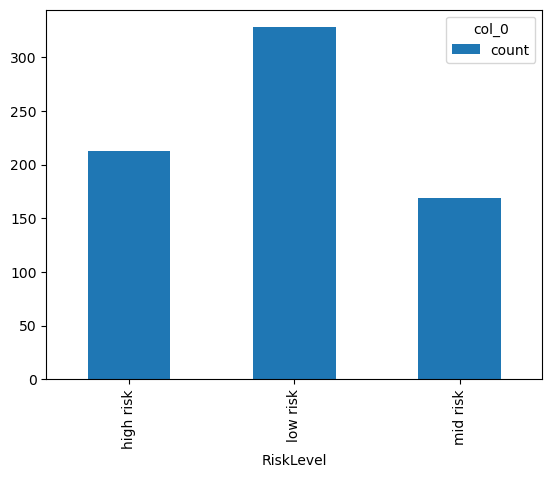

In [24]:
tab_train.plot.bar()

<AxesSubplot:xlabel='RiskLevel'>

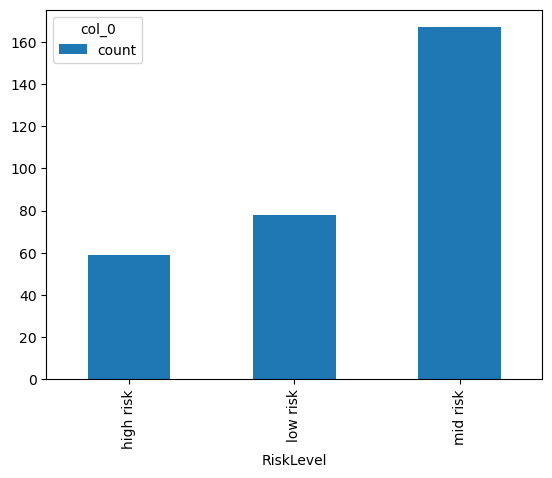

In [25]:
tab_test.plot.bar()

In [26]:
#KNN GridSearchCV
param_grid=[{"weights":["uniform","distance"],"n_neighbors":[1,2,3,4,5,6,7]}]

In [27]:
knn_clf=KNeighborsClassifier()

In [28]:
grid_search=GridSearchCV(knn_clf,param_grid,cv=5,verbose=3)

In [29]:
grid_search.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.887 total time=   0.0s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.739 total time=   0.0s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.683 total time=   0.0s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.655 total time=   0.0s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.570 total time=   0.0s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.887 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.739 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.683 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.655 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.570 total time=   0.0s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.810 total time=   0.0s
[CV 2/5] END ....n_neighbors=2, weights=uniform;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [30]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [31]:
grid_search.best_score_

0.7352112676056338

In [32]:
y_pred=grid_search.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.8947368421052632

In [34]:
balanced_accuracy_score(y_test,y_knn_pred)

0.911501638183867

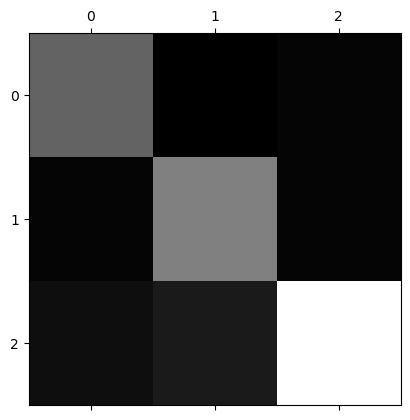

In [35]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [36]:
#NAIVE-BAYES
gnb=GaussianNB()
nb_pred=gnb.fit(X_train,y_train.values.ravel())
nb_predicted=nb_pred.predict(X_test)

In [37]:
#accuracy score
accuracy_score(y_test,nb_predicted,normalize=True)

0.45723684210526316

In [38]:
#balanced accuracy score
balanced_accuracy_score(y_test,nb_predicted)

0.566600827029123

In [39]:
conf_mx=confusion_matrix(y_test,nb_predicted)
display(conf_mx)

array([[ 38,   6,  15],
       [  2,  66,  10],
       [ 15, 117,  35]])

In [40]:
#SUPPORT VECTOR MACHINE
# Define the SVM model with a poly kernel
svm_model = SVC(kernel='poly')

In [41]:
# Fit the model to the training data
svm_model.fit(X_train, y_train.values.ravel())

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

In [42]:
# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

0.4309210526315789

In [61]:
#balanced accuracy score
balanced_accuracy_score(y_test,y_pred)

0.5937859179511469

In [43]:
conf_mx=confusion_matrix(y_test,y_pred)
display(conf_mx)

array([[ 41,  14,   4],
       [  3,  75,   0],
       [ 21, 131,  15]])

In [44]:
#Define the SVM model with a linear kernel
svm_model = SVC(kernel='linear')

In [45]:
# Fit the model to the training data
svm_model.fit(X_train, y_train.values.ravel())

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

0.40460526315789475

In [46]:
conf_mx=confusion_matrix(y_test,y_pred)
display(conf_mx)

array([[ 52,   2,   5],
       [ 10,  61,   7],
       [ 50, 107,  10]])

In [47]:
#Define the SVM model with a RBF kernel
svm_model = SVC(kernel='rbf')

In [48]:
# Fit the model to the training data
svm_model.fit(X_train, y_train.values.ravel())

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

0.35526315789473684

In [49]:
conf_mx=confusion_matrix(y_test,y_pred)
display(conf_mx)

array([[ 32,  27,   0],
       [  2,  76,   0],
       [ 14, 153,   0]])

In [62]:
#Decision Tree
# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=83)
clf.fit(X_train, y_train.values.ravel())

# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [63]:
#accuracy score 
accuracy_score(y_test, y_pred)

0.8717105263157895

In [64]:
#balanced_accuracy_score
balanced_accuracy_score(y_test,y_pred)

0.8998070785851157

In [65]:
conf_mx=confusion_matrix(y_test,y_pred)
display(conf_mx)

array([[ 56,   0,   3],
       [  3,  73,   2],
       [  8,  23, 136]])

In [54]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train.values.ravel())

# make predictions on test data
y_pred = lr.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.69      0.69      0.69        59
    low risk       0.34      0.95      0.50        78
    mid risk       0.85      0.14      0.24       167

    accuracy                           0.45       304
   macro avg       0.63      0.59      0.48       304
weighted avg       0.69      0.45      0.39       304



/Users/geraldgaitos/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
